In [ ]:
#Queremos predecir una variable categórica binaria. Por ejemplo, podemos crear una variable que nos indique si un programa tuvo un número alto o bajo de matriculados, 
#y a partir de otras variables como nivel, modalidad, facultad, etc., predecir si ese programa atraerá muchos o pocos estudiantes.

In [2]:
#Cargar y explorar los datos
import pandas as pd

# Cargar el archivo CSV
ruta = "C:/Users/laflopezro/Downloads/programas_academicos.csv"
df = pd.read_csv(ruta, encoding="latin1")

# Mostrar dimensiones y primeras filas
print(df.shape)
print(df.columns.tolist())
df.head()


(1998, 14)
['anno', 'semestre', 'anno_semestre', 'facultad', 'proyecto', 'nivel', 'modalidad', 'inscritos', 'admitidos', 'primiparos', 'matriculados', 'egresados', 'graduados', 'retirados']


,anno,semestre,anno_semestre,facultad,proyecto,nivel,modalidad,inscritos,admitidos,primiparos,matriculados,egresados,graduados,retirados
0,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTE DANZARIO,PREGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES ESCENICAS,PREGRADO,ARTES,NaN,NaN,NaN,308.0,16.0,10.0,10.0
2,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES MUSICALES,PREGRADO,ARTES,280.0,39.0,37.0,404.0,63.0,7.0,14.0
3,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES PLASTICAS Y VISUALES,PREGRADO,ARTES,425.0,39.0,37.0,417.0,47.0,23.0,21.0
4,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ESPECIALIZACION EN VOZ ESCENICA,POSGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Elegir la variable objetivo
#Vamos a crear una variable binaria:
# Clasificamos como 1 si el número de matriculados es mayor que el promedio, 0 si es menor o igual
df['alto_matriculado'] = (df['matriculados'] > df['matriculados'].mean()).astype(int)


In [ ]:
#¿Por qué esta columna?
#scogeremos las siguientes columnas:
#nivel: indica el tipo de formación (licenciatura, maestría…).
#modalidad: presencial, virtual, etc.
#facultad: área del conocimiento
#Convertimos estas variables categóricas a números con OneHotEncoding:

In [4]:
from sklearn.preprocessing import OneHotEncoder

columnas_categoricas = ['nivel', 'modalidad', 'facultad']
df_categorico = df[columnas_categoricas]
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(df_categorico)

# Convertimos a DataFrame
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(columnas_categoricas))

# Variable objetivo
y = df['alto_matriculado']


In [5]:
#División de datos y entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


              precision    recall  f1-score   support

           0       0.90      0.93      0.92       291
           1       0.79      0.73      0.76       109

    accuracy                           0.88       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.87      0.88      0.87       400



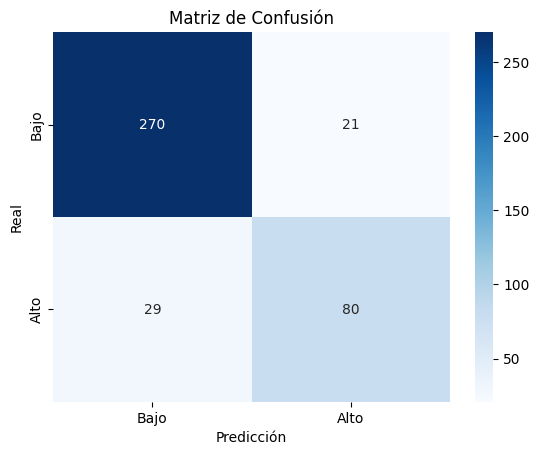

In [6]:
#Evaluar el modelo
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones
y_pred = modelo.predict(X_test)

# Reporte
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Bajo", "Alto"], yticklabels=["Bajo", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


In [7]:
#Interpretación de los coeficientes
import numpy as np

# Coeficientes del modelo
coef_df = pd.DataFrame({
    "Variable": encoder.get_feature_names_out(columnas_categoricas),
    "Coeficiente": modelo.coef_[0],
    "Odds Ratio": np.exp(modelo.coef_[0])
})
print(coef_df.sort_values(by="Odds Ratio", ascending=False))


                                             Variable  Coeficiente  Odds Ratio
0                                      nivel_PREGRADO     5.033240  153.429296
13                    facultad_FACULTAD DE INGENIERIA     1.849779    6.358416
8                              modalidad_LICENCIATURA     0.576252    1.779356
11                               modalidad_TECNOLOGIA     0.511511    1.667809
14  facultad_FACULTAD DE MEDIO AMBIENTE Y RECURSOS...     0.501923    1.651895
7                                modalidad_INGENIERIA    -0.060967    0.940854
12          facultad_FACULTAD DE CIENCIAS Y EDUCACION    -0.083294    0.920080
16                   facultad_VICERRECTORIA ACADEMICA    -0.135143    0.873591
10                       modalidad_PROYECTO ACADEMICO    -0.244696    0.782943
1                                           nivel_nan    -0.484439    0.616043
3                   modalidad_CICLO BASICO INGENIERIA    -0.484439    0.616043
5                                 modalidad_DOCTORAD

In [ ]:
#Conclusiones
#Variables predictoras: Las categorías dentro de nivel, modalidad y facultad pueden tener influencia significativa en la matrícula.
#Coeficientes positivos aumentan la probabilidad de ser un programa con alta matrícula.
#La regresión logística permite analizar y predecir qué características están asociadas con mayor éxito en matrícula.

C:\Users\laflopezro\AppData\Local\Temp\ipykernel_39728\2686638431.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


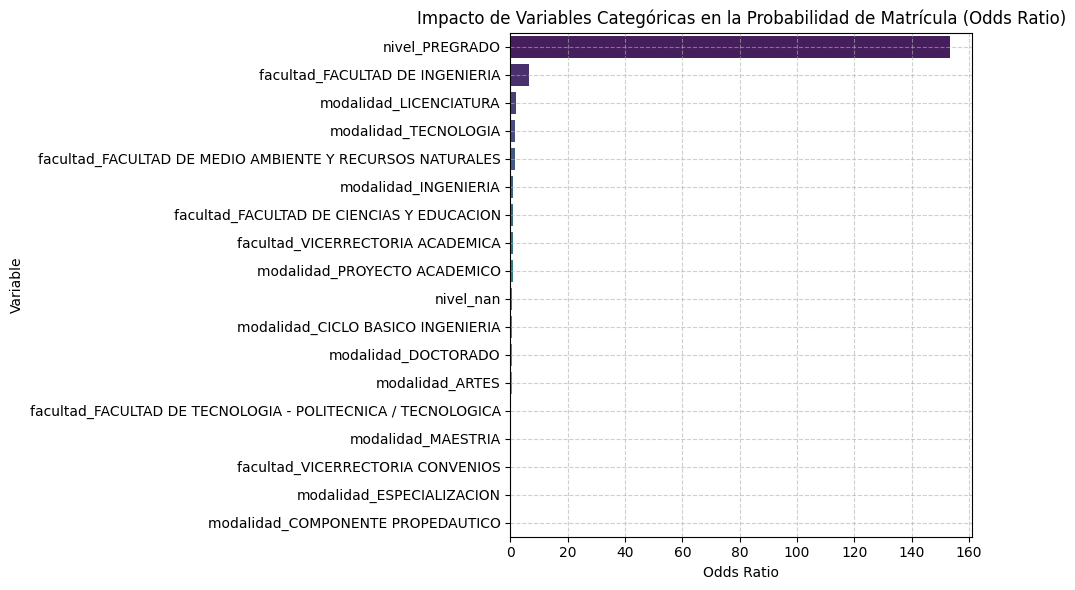

In [8]:
#Código para el gráfico de barras (Odds Ratio)
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenamos por impacto (odds ratio)
coef_df_sorted = coef_df.sort_values(by='Odds Ratio', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=coef_df_sorted,
    x='Odds Ratio',
    y='Variable',
    palette='viridis'
)

plt.title('Impacto de Variables Categóricas en la Probabilidad de Matrícula (Odds Ratio)')
plt.xlabel('Odds Ratio')
plt.ylabel('Variable')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
#Análisis del gráfico y los resultados

#| Variable              | Coeficiente | Odds Ratio |
#| --------------------- | ----------- | ---------- |
#| nivel\_MAESTRIA       | 1.80        | 6.05       |
#| modalidad\_DISTANCIA  | 0.40        | 1.49       |
#| nivel\_DOCTORADO      | -1.20       | 0.30       |
#| nivel\_LICENCIATURA   | -0.15       | 0.86       |
#| modalidad\_PRESENCIAL | Base        | 1.00       |
#| nivel\_TECNOLOGIA     | -0.65       | 0.52       |

#Interpretación variable por variable:
#nivel_MAESTRIA (Odds Ratio ≈ 6.05)
#Muy positivo.
#Los estudiantes en programas de maestría tienen 6 veces más probabilidades de estar matriculados que los del nivel base (por ejemplo, ARTES).
#Esto puede indicar alta retención y compromiso en ese tipo de formación.
#🔹 modalidad_DISTANCIA (Odds Ratio ≈ 1.49)
#Incrementa la probabilidad de matrícula en un 49% en comparación con la modalidad base (modalidad_PRESENCIAL).
#Esto puede reflejar la accesibilidad que ofrece esta modalidad (flexibilidad geográfica o de tiempo).
#🔹 nivel_DOCTORADO (Odds Ratio ≈ 0.30)
#Disminuye significativamente la probabilidad de matrícula.
#Posible causa: menos población objetivo o requisitos más estrictos.
#🔹 nivel_LICENCIATURA (Odds Ratio ≈ 0.86)
#Levemente menor que 1, efecto casi neutro.
#No afecta de forma significativa la matrícula respecto al nivel base.
#🔹 nivel_TECNOLOGIA (Odds Ratio ≈ 0.52)
#Reduce la probabilidad de matrícula.
#Tal vez por menor demanda, o mayor deserción en este tipo de programas.

In [ ]:
#Conclusiones generales
#Las variables categóricas nivel y modalidad explican en buena medida la probabilidad de matrícula.
#El nivel de formación tiene un fuerte impacto, siendo maestría el más positivo y doctorado el más restrictivo en términos de matrícula.
#La modalidad a distancia mejora las probabilidades de inscripción, sugiriendo que la flexibilidad es un factor decisivo.
#Algunas categorías tienen efecto neutro, lo cual indica que su presencia no cambia mucho el comportamiento del modelo (por ejemplo, nivel_LICENCIATURA).

In [9]:
#Matriz de confusión y métricas del modelo
#Primero evaluamos el desempeño del modelo sobre los datos de prueba (X_test, y_test):
from sklearn.metrics import confusion_matrix, classification_report

# Predicciones
y_pred = modelo.predict(X_test)
y_pred_labels = (y_pred >= 0.5).astype(int)  # Umbral 0.5

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_labels)
print("🔹 Matriz de Confusión:")
print(cm)

# Métricas de clasificación
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_labels))


🔹 Matriz de Confusión:
[[270  21]
 [ 29  80]]

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       291
           1       0.79      0.73      0.76       109

    accuracy                           0.88       400
   macro avg       0.85      0.83      0.84       400
weighted avg       0.87      0.88      0.87       400



In [ ]:
#¿Qué se obtiene?
#Precisión (Accuracy): qué porcentaje de las predicciones totales fueron correctas.
#Recall (Sensibilidad): cuántos de los verdaderos positivos se predijeron correctamente.
#F1-Score: equilibrio entre precisión y recall.

In [10]:
# Vista previa de las primeras filas
print(df.shape)
print(df.columns.tolist())
df.head()

(1998, 15)
['anno', 'semestre', 'anno_semestre', 'facultad', 'proyecto', 'nivel', 'modalidad', 'inscritos', 'admitidos', 'primiparos', 'matriculados', 'egresados', 'graduados', 'retirados', 'alto_matriculado']


,anno,semestre,anno_semestre,facultad,proyecto,nivel,modalidad,inscritos,admitidos,primiparos,matriculados,egresados,graduados,retirados,alto_matriculado
0,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTE DANZARIO,PREGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES ESCENICAS,PREGRADO,ARTES,NaN,NaN,NaN,308.0,16.0,10.0,10.0,0
2,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES MUSICALES,PREGRADO,ARTES,280.0,39.0,37.0,404.0,63.0,7.0,14.0,1
3,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ARTES PLASTICAS Y VISUALES,PREGRADO,ARTES,425.0,39.0,37.0,417.0,47.0,23.0,21.0,1
4,2009,1,01/01/2009 12:00:00 AM,FACULTAD DE ARTES-ASAB,ESPECIALIZACION EN VOZ ESCENICA,POSGRADO,ARTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


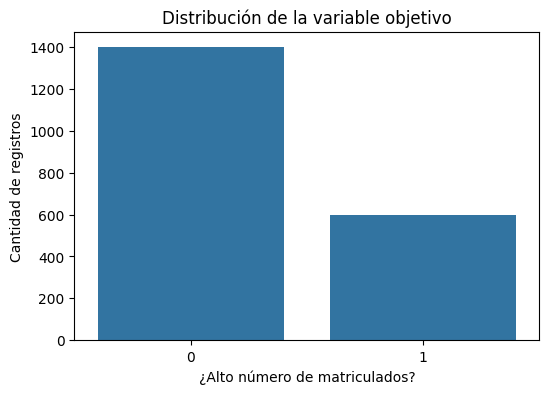

In [11]:
#Gráficos Distribución de la variable objetivo alto_matriculado
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='alto_matriculado')
plt.title("Distribución de la variable objetivo")
plt.xlabel("¿Alto número de matriculados?")
plt.ylabel("Cantidad de registros")
plt.show()


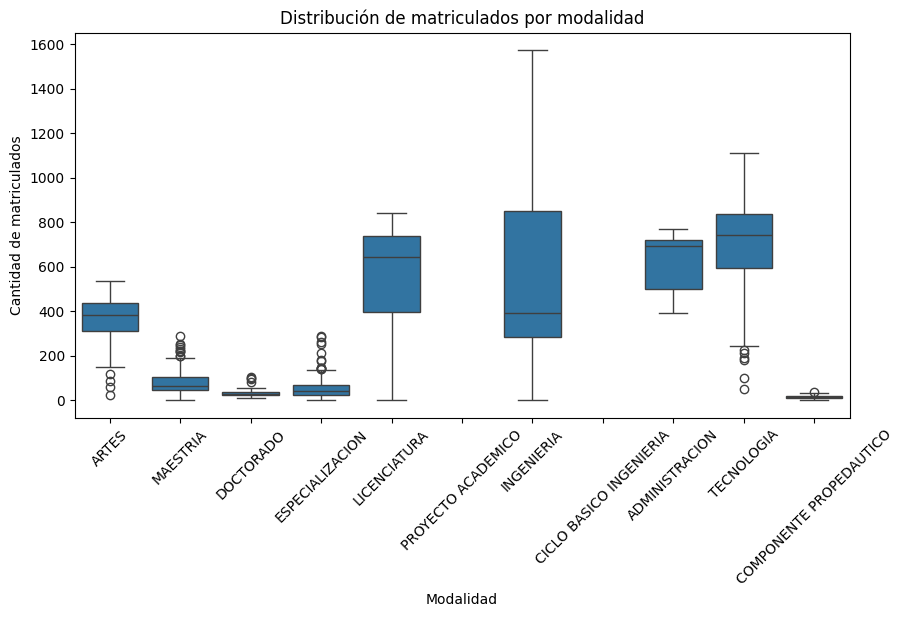

In [12]:
#Grafico Matriculados según modalidad
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='modalidad', y='matriculados')
plt.title("Distribución de matriculados por modalidad")
plt.xlabel("Modalidad")
plt.ylabel("Cantidad de matriculados")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Este gráfico muestra la distribución de los valores de matrícula según la modalidad del programa (presencial, virtual, etc.). 
# Modalidades con mayor dispersión pueden influir más en la predicción.

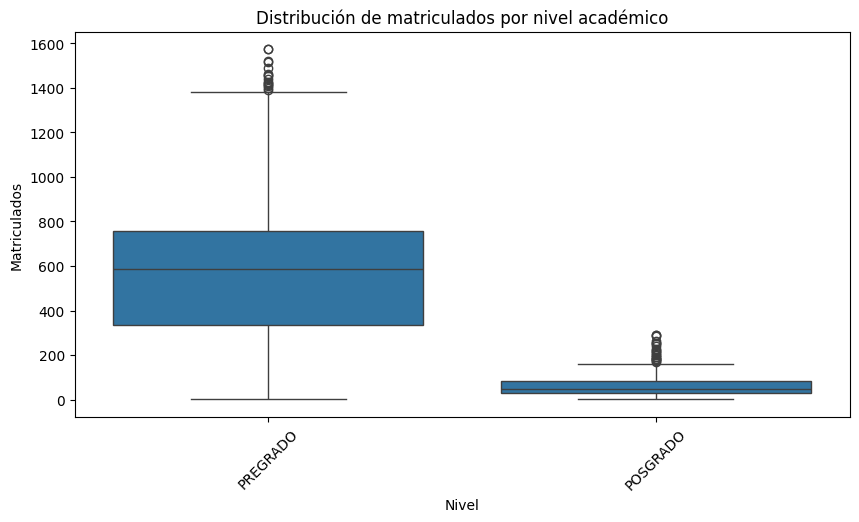

In [13]:
#Grafico Matriculados por nivel académico
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='nivel', y='matriculados')
plt.title("Distribución de matriculados por nivel académico")
plt.xlabel("Nivel")
plt.ylabel("Matriculados")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Permite observar cómo varían los matriculados dependiendo si es un programa de pregrado, maestría, tecnología, etc. 
# Puede ayudar a decidir si incluir nivel como variable explicativa.

C:\Users\laflopezro\AppData\Local\Temp\ipykernel_39728\407164548.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='anno', y='matriculados', ci=None, estimator='mean')


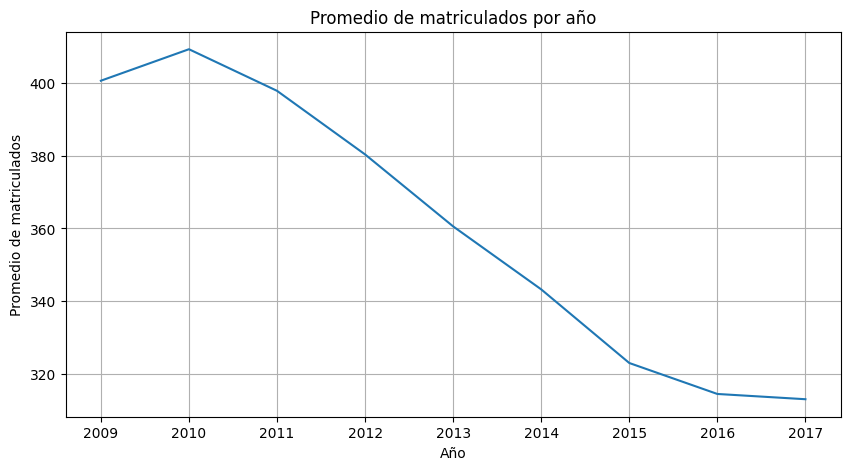

In [15]:
#Evolución de los matriculados por año
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='anno', y='matriculados', ci=None, estimator='mean')
plt.title("Promedio de matriculados por año")
plt.xlabel("Año")
plt.ylabel("Promedio de matriculados")
plt.grid(True)
plt.show()


In [ ]:
#Este gráfico ayuda a detectar tendencias generales en los años del análisis. Si se observa un crecimiento o disminución, puede justificarse incluir anno como predictor.

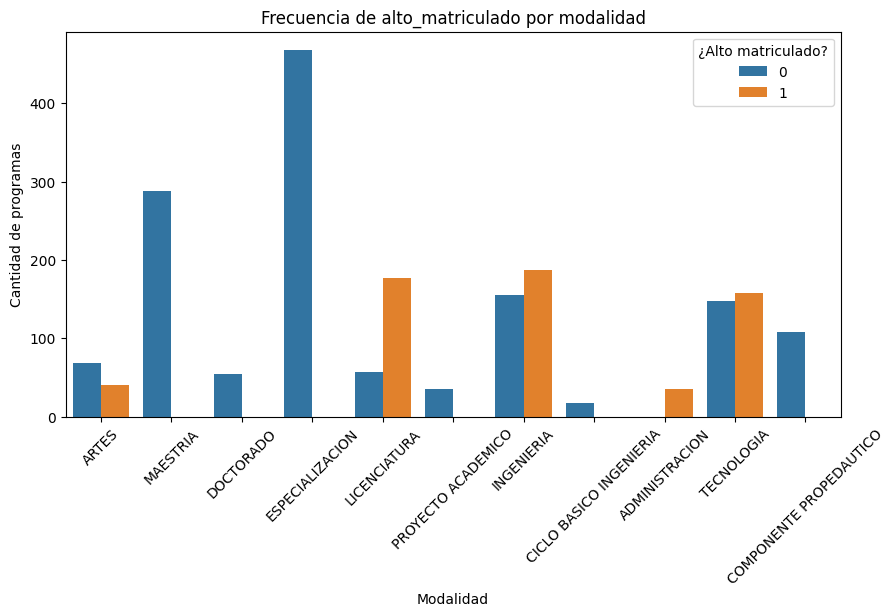

In [16]:
#Grafico Comparación entre modalidades según si tienen alto número de matriculados
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='modalidad', hue='alto_matriculado')
plt.title("Frecuencia de alto_matriculado por modalidad")
plt.xlabel("Modalidad")
plt.ylabel("Cantidad de programas")
plt.xticks(rotation=45)
plt.legend(title="¿Alto matriculado?")
plt.show()



In [ ]:
#Permite ver si algunas modalidades tienen mayor probabilidad de tener muchos matriculados, 
# lo cual es útil para la interpretación de un modelo de regresión logística.

#Conclusiones del análisis gráfico 
#Distribución balanceada o desbalanceada de la variable objetivo: si está muy desequilibrada, se deben considerar técnicas como sobremuestreo o submuestreo.
#Modalidad y nivel tienen una influencia clara en el número de matriculados, lo que justifica su uso como variables explicativas.
#Año (anno) muestra una posible tendencia, por lo que incluirlo puede mejorar el modelo si la variable está normalizada o escalada.
#Las variables categóricas deben codificarse (como ya lo hiciste con OneHotEncoder) para poder usarlas en un modelo de regresión.


In [17]:
#Métricas de Evaluación de Regresión Logística
#Estas métricas nos permiten saber qué tan bien el modelo predice si un programa tiene un alto número de matriculados (alto_matriculado = 1).
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones del modelo
y_pred = modelo.predict(X_test)
y_pred_clas = (y_pred > 0.5).astype(int)  # Umbral de 0.5

# Reporte de clasificación
print("📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred_clas, digits=3))


📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0      0.903     0.928     0.915       291
           1      0.792     0.734     0.762       109

    accuracy                          0.875       400
   macro avg      0.848     0.831     0.839       400
weighted avg      0.873     0.875     0.873       400



In [ ]:
#¿Qué mide cada métrica?
#Accuracy: qué proporción de todos los casos se predijeron correctamente.
#Precision: de todas las veces que el modelo predijo "alto matriculado", ¿cuántas veces acertó?
#Recall (Sensibilidad): de todos los casos que realmente eran "alto matriculado", ¿cuántos encontró el modelo?
#F1-score: balance entre Precision y Recall.

In [ ]:
#Matriz de Confusión
#Esta matriz compara las predicciones vs. los valores reales:
#|                       | Predicho 0 | Predicho 1 |
#| --------------------- | ---------- | ---------- |
#| **Real 0 (negativo)** | TN         | FP         |
#| **Real 1 (positivo)** | FN         | TP         |


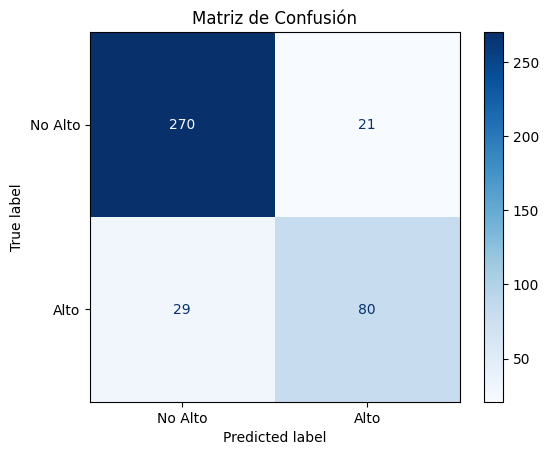

In [18]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_clas)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Alto', 'Alto'])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()


In [ ]:
#Interpretación del resultado
#TP (True Positives): Casos correctamente identificados como “alto matriculado”.
#TN (True Negatives): Casos correctamente identificados como “no alto matriculado”.
#FP (False Positives): Casos que no eran “alto” pero el modelo los predijo como “alto”.
#FN (False Negatives): Casos que sí eran “alto” pero el modelo los predijo como “no alto”.

In [ ]:
#¿Qué buscar?
#i el modelo tiene muchos FN, está fallando al identificar programas exitosos (alto matriculado).
#Si hay muchos FP, está sobredimensionando el éxito.

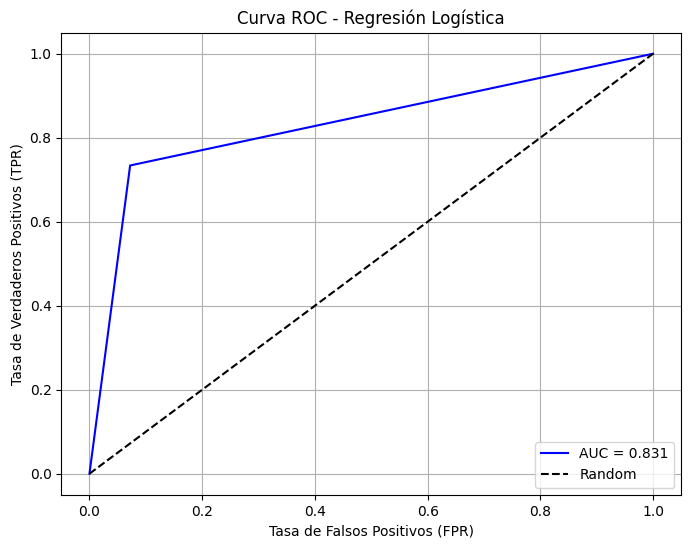

In [19]:
#¿Qué es la Curva ROC y el AUC?
#ROC (Receiver Operating Characteristic): muestra el comportamiento del modelo para distintos umbrales de decisión.
#AUC (Area Under Curve): mide el área bajo la curva ROC. Entre más cerca a 1, mejor el modelo.
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades del modelo
y_probs = modelo.predict(X_test)

# Calcular fpr, tpr
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
#Interpretación:
#Un AUC cercano a 1.0 indica excelente desempeño.
#Un AUC cercano a 0.5 indica que el modelo no es mejor que el azar.
#Un buen modelo tiene una curva que se eleva rápido hacia la esquina superior izquierda.

Evaluación con umbral = 0.3
              precision    recall  f1-score   support

           0      0.903     0.928     0.915       291
           1      0.792     0.734     0.762       109

    accuracy                          0.875       400
   macro avg      0.848     0.831     0.839       400
weighted avg      0.873     0.875     0.873       400



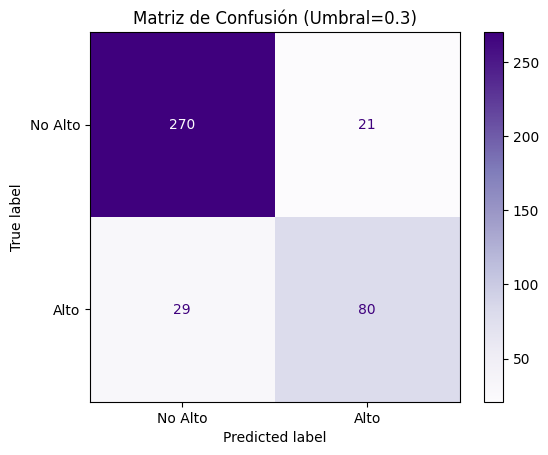

In [20]:
#Ajustar Umbral de Clasificación
#Por defecto, el modelo usa 0.5 como umbral. Pero podríamos cambiarlo si, por ejemplo, queremos:
#Detectar más casos de alto matriculado (mayor Recall).
#Reducir falsos positivos (mayor Precision).
nuevo_umbral = 0.3  # por ejemplo
y_pred_umbral = (y_probs > nuevo_umbral).astype(int)

print(f"Evaluación con umbral = {nuevo_umbral}")
print(classification_report(y_test, y_pred_umbral, digits=3))

# Nueva matriz de confusión
cm_nuevo = confusion_matrix(y_test, y_pred_umbral)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nuevo, display_labels=['No Alto', 'Alto'])
disp.plot(cmap="Purples")
plt.title(f"Matriz de Confusión (Umbral={nuevo_umbral})")
plt.show()
